In [88]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import _redshift_richness_bins

Text(0, 0.5, '$\\log_{10}\\frac{M}{M_{fid}}$')

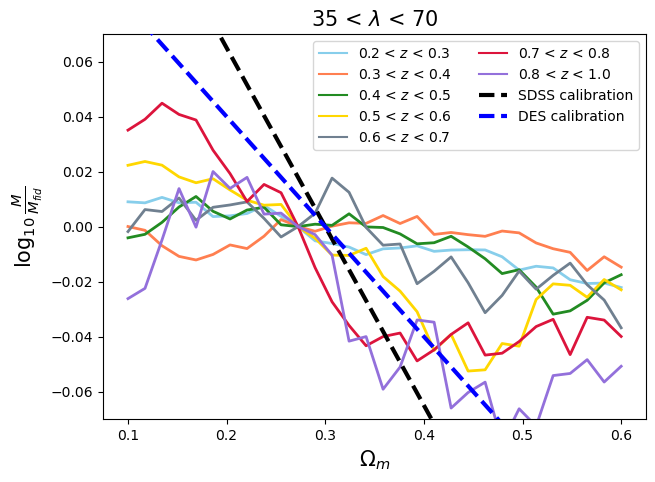

In [95]:
name = 'fid_Om{}cluster-masses_1-halo=nfw+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez.pkl'
plt.figure(figsize=(7,5))
Om_list = np.linspace(0.1, 0.6, 30)
idxOm = np.argmin(np.abs(Om_list - 0.2648))
closest_valueOm = Om_list[idxOm]
colors = [
    "#87CEEB",  # Sky Blue
    "#FF7F50",  # Coral
    "#228B22",  # Forest Green
    "#FFD700",  # Gold
    "#708090",  # Slate Gray
    "#DC143C",  # Crimson
    "#9370DB",  # Medium Purple
    "#008080",  # Teal
    "#FF8C00",  # Dark Orange
    "#20B2AA"   # Light Sea Green
]
for i, z_bin in enumerate(_redshift_richness_bins.Z_bin):

    plt.plot([], [], color=colors[i], label = f'{z_bin[0]} < $z$ < {z_bin[1]}')
    for j, richness_bin in enumerate(_redshift_richness_bins.Obs_bin):
        if j!=1: continue
        ratio = []
        err = []
        for k, Om_ in enumerate(Om_list):
           m = np.load(name.format(k), allow_pickle=True)['masses']
           mask = (np.array(m['z_mean']) > z_bin[0])*(np.array(m['z_mean']) < z_bin[1])
           mask *= (np.array(m['obs_mean']) > richness_bin[0])*(np.array(m['obs_mean']) < richness_bin[1])
           ratio.append(m[mask]['log10M200c_WL'])
           err.append(m[mask]['err_log10M200c_WL'])
        plt.title(f'{richness_bin[0]} < $\lambda$ < {richness_bin[1]}', fontsize=15)

        plt.plot(Om_list, ratio - ratio[idxOm], lw=2, color=colors[i],)
plt.plot(Om_list, -0.65*(Om_list - 0.3), '--',
                    lw=3, color='k', label = f'SDSS calibration', zorder=100)
plt.plot(Om_list, -0.4*(Om_list - 0.3), '--',
                    lw=3, color='b', label = f'DES calibration', zorder=100)
plt.xlabel(r'$\Omega_m$', fontsize=15)
plt.legend(ncols=2)
plt.ylim(-0.07, 0.07)
plt.ylabel(r'$\log_{10}\frac{M}{M_{fid}}$', fontsize=15, rotation=90)